In [14]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_to_load = files.upload()

df = pd.read_csv('gini_index_data.csv')

df.head

Saving gini_index_data.csv to gini_index_data (8).csv


<bound method NDFrame.head of      outlook temperature humidity    wind Decision
0      sunny         hot     high    weak       No
1      sunny         hot     high  strong       No
2   overcast         hot     high    weak      Yes
3   rainfall        mild     high    weak      Yes
4   rainfall        cool   normal    weak      Yes
5   rainfall        cool   normal  strong       No
6   overcast        cool   normal  strong      Yes
7      sunny        mild     high    weak       No
8      sunny        cool   normal    weak      Yes
9   rainfall        mild   normal    weak      Yes
10     sunny        mild   normal  strong      Yes
11  overcast        mild     high  strong      Yes
12  overcast         hot   normal    weak      Yes
13  rainfall        mild     high  strong       No>

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['outlook'] = le.fit_transform(df['outlook'])
df['temperature'] = le.fit_transform(df['temperature'])
df['humidity'] = le.fit_transform(df['humidity'])
df['wind'] = le.fit_transform(df['wind'])
df['Decision'] = le.fit_transform(df['Decision'])

X = df[['outlook','temperature','humidity','wind']]
y = df['Decision']
df.head

<bound method NDFrame.head of     outlook  temperature  humidity  wind  Decision
0         2            1         0     1         0
1         2            1         0     0         0
2         0            1         0     1         1
3         1            2         0     1         1
4         1            0         1     1         1
5         1            0         1     0         0
6         0            0         1     0         1
7         2            2         0     1         0
8         2            0         1     1         1
9         1            2         1     1         1
10        2            2         1     0         1
11        0            2         0     0         1
12        0            1         1     1         1
13        1            2         0     0         0>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train



array([[ 0.98994949,  0.81649658, -0.89442719,  0.89442719],
       [-1.55563492,  0.81649658, -0.89442719, -1.11803399],
       [ 0.98994949,  0.81649658,  1.11803399, -1.11803399],
       [ 0.98994949, -1.63299316,  1.11803399,  0.89442719],
       [-1.55563492, -0.40824829,  1.11803399,  0.89442719],
       [-0.28284271,  0.81649658, -0.89442719,  0.89442719],
       [-0.28284271, -1.63299316,  1.11803399, -1.11803399],
       [ 0.98994949, -0.40824829, -0.89442719,  0.89442719],
       [-0.28284271,  0.81649658, -0.89442719, -1.11803399]])

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(criterion="gini")
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
y_pred

array([0, 0, 1, 0, 1])

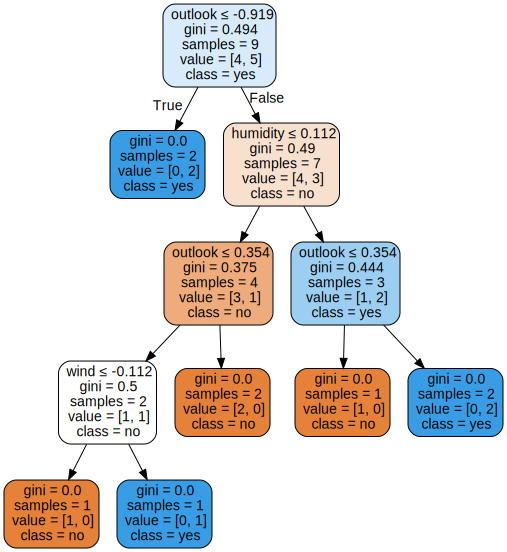

In [22]:
import graphviz
gr_data = export_graphviz(tree,out_file=None)
graph = graphviz.Source(gr_data)
graph.render("iris")
gr_data = export_graphviz(tree, out_file=None, feature_names=['outlook','temperature','humidity','wind'], class_names=['no','yes'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(gr_data)
graph